<a href="https://colab.research.google.com/github/Shah03-rgb/diya_bati_ss/blob/main/trying_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load dataset
file_path = "/content/Diabetic_expandeddataset.xlsx"
df = pd.read_excel(file_path)

# Display column names to identify target and features
print("Columns in dataset:", df.columns)

# Define target variable and features
target = "Age at Diagnosis"
features = [col for col in df.columns if col != target]

# Handle missing values (if any)
df = df.dropna()

# Convert age ranges to numerical midpoints
def convert_age_range(age):
    age = str(age)
    if '-' in age:  # Handles ranges like '45-54'
        low, high = map(int, age.split('-'))
        return (low + high) / 2  # Midpoint
    elif '+' in age:  # Handles '65+'
        low = int(age.replace('+', ''))
        return low + 5  # Approximate midpoint for open-ended range
    elif 'or older' in age:  # Handles cases like '55 or older'
        low = int(age.split(' ')[0])  # Extracts the numerical part
        return low + 5  # Approximate midpoint
    else:
        return float(age)  # If it's already a number

df[target] = df[target].apply(convert_age_range)

df[target] = df[target].apply(convert_age_range)

# Ensure all features are numeric (one-hot encode categorical features if any)
X = pd.get_dummies(df[features])
y = df[target]

# Create a pipeline with scaling and regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using cross-validation
mae_scores = -cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')

# Print results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Average MAE: {np.mean(mae_scores)}")

Columns in dataset: Index(['Age Group', 'Gender', 'Height', 'Weight', 'Current Occupation',
       'Age at Diagnosis', 'Fasting Blood Sugar', 'Postprandial Blood Sugar',
       'Average Blood sugar in 3 months', 'HbA1c Levels', 'Use of Medication',
       'Frequency of Doctor Visits', 'Frequency of Blood Sugar Testing',
       'Other Chronic Conditions', 'Meal Frequency', 'Sugar Consumption',
       'Oily Food Consumption', 'Processed Food Consumption',
       'Food Source Preference', 'Physical Activity Level', 'Smoking Habits',
       'Alcohol Consumption', 'Sleep Patterns',
       'Which side of the family has diabetes', 'Maternal_Age at Diagnosis',
       'Maternal_Duration of Diabetes', 'Maternal_HbA1c Levels',
       'Maternal_Use of Medication', 'Maternal_Dietary Pattern',
       'Maternal_Physical Activity Level', 'Paternal_Age at Diagnosis',
       'Paternal_Duration of Diabetes', 'Paternal_HbA1c Levels',
       'Paternal_Use of Medication', 'Paternal_Dietary Pattern',
       

In [26]:
print(df.describe())  # Summary of numerical features


           Height     Weight  Age at Diagnosis  Fasting Blood Sugar  \
count   64.000000  64.000000         64.000000            64.000000   
mean   167.270450  74.497907         49.007812           145.148932   
std      7.061454  10.411012          7.926994            34.473942   
min    158.418154  57.008314         39.500000            84.514708   
25%    160.822228  64.785099         39.500000           119.669220   
50%    165.555961  74.881577         49.500000           148.291523   
75%    175.085386  83.400356         60.000000           173.942898   
max    180.000000  91.128262         60.000000           200.000000   

       Postprandial Blood Sugar  Average Blood sugar in 3 months  
count                 64.000000                        64.000000  
mean                 216.969600                       208.789265  
std                   53.314168                        54.170127  
min                  118.024958                       115.720937  
25%                  174.

In [27]:
print(df.isna().sum())  # Count missing values in each column
#result shows 0 missing values

Age Group                                       0
Gender                                          0
Height                                          0
Weight                                          0
Current Occupation                              0
Age at Diagnosis                                0
Fasting Blood Sugar                             0
Postprandial Blood Sugar                        0
Average Blood sugar in 3 months                 0
HbA1c Levels                                    0
Use of Medication                               0
Frequency of Doctor Visits                      0
Frequency of Blood Sugar Testing                0
Other Chronic Conditions                        0
Meal Frequency                                  0
Sugar Consumption                               0
Oily Food Consumption                           0
Processed Food Consumption                      0
Food Source Preference                          0
Physical Activity Level                         0


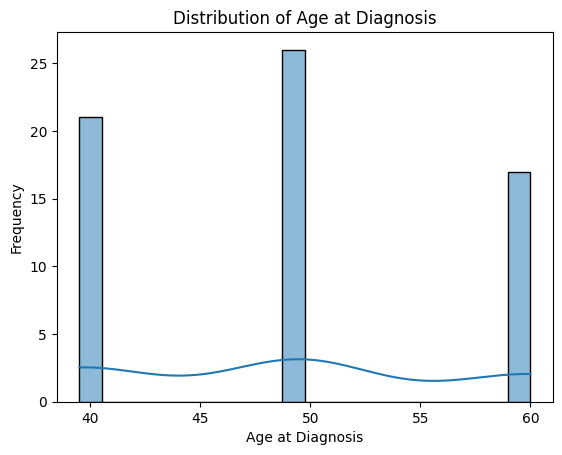

In [32]:
sns.histplot(df[target], bins=20, kde=True)
plt.title("Distribution of Age at Diagnosis")
plt.xlabel("Age at Diagnosis")
plt.ylabel("Frequency")
plt.show()


In [34]:
print(df.columns)  # Look for alcohol, junk food, or dietary columns
#for segregation of alcohols nd other unhealthy foods

Index(['Age Group', 'Gender', 'Height', 'Weight', 'Current Occupation',
       'Age at Diagnosis', 'Fasting Blood Sugar', 'Postprandial Blood Sugar',
       'Average Blood sugar in 3 months', 'HbA1c Levels', 'Use of Medication',
       'Frequency of Doctor Visits', 'Frequency of Blood Sugar Testing',
       'Other Chronic Conditions', 'Meal Frequency', 'Sugar Consumption',
       'Oily Food Consumption', 'Processed Food Consumption',
       'Food Source Preference', 'Physical Activity Level', 'Smoking Habits',
       'Alcohol Consumption', 'Sleep Patterns',
       'Which side of the family has diabetes', 'Maternal_Age at Diagnosis',
       'Maternal_Duration of Diabetes', 'Maternal_HbA1c Levels',
       'Maternal_Use of Medication', 'Maternal_Dietary Pattern',
       'Maternal_Physical Activity Level', 'Paternal_Age at Diagnosis',
       'Paternal_Duration of Diabetes', 'Paternal_HbA1c Levels',
       'Paternal_Use of Medication', 'Paternal_Dietary Pattern',
       'Paternal_Physical A

'Alcohol Consumption', 'Sugar Consumption', 'Oily Food Consumption', 'Processed Food Consumption', 'Smoking Habits'

In [ ]:
# Assuming 'Alcohol Consumption' and 'Junk Food Intake' exist in the dataset
alcohol_consumers = df[df["Alcohol Consumption"] > 0]  # People who consume alcohol
non_alcohol_consumers = df[df["Alcohol Consumption"] == 0]  # Those who don't

oily_food_consumers = df[df["Oily Food Consumption"] > 0]  # People who eat junk food
healthy_eaters = df[df["Oily Food Consumption"] == 0]  # Those who avoid it

sugar_consumers = df[df["Sugar Consumption"] > 0]  # People who consume sugar
non_sugar_consumers = df[df["Sugar Consumption"] == 0]  # Those who don't

processed_food_consumers = df[df["Processed Food Consumption"] > 0]  # People who consume processed food
non_processed_food_consumers = df[df["Processed Food Consumption"] == 0]  # Those who don't

smokers = df[df["Smoking Habits"] > 0]  # People who smoke
non_smokers = df[df["Smoking Habits"] == 0]  # Those who don't

#gotta convert the string values under these columns into integers(like never,rarely, etc into numbers)  :)

#don't run this without making changes in the dataset  :)

'''
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Alcohol Consumption"] > 0, y=df["Age at Diagnosis"])
plt.xlabel("Alcohol Consumption (0 = No, 1 = Yes)")
plt.ylabel("Age at Diagnosis")
plt.title("Effect of Alcohol on Age at Diagnosis")
plt.show()

'''

'''

from scipy.stats import ttest_ind

# Alcohol impact test
t_stat, p_value = ttest_ind(alcohol_consumers["Age at Diagnosis"], non_alcohol_consumers["Age at Diagnosis"], equal_var=False)
print(f"Alcohol Consumption Impact - t-statistic: {t_stat}, p-value: {p_value}")

'''

#run this for each column attribute after making changes and running the former code


Do the same for

"take considerations from the parental side .... nd maternal side for the data analysis add their lifestyle , consumptions nd everthing"

